# Import Library yang akan digunakan

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Memuat dataset

In [196]:
df = pd.read_csv("large_data.csv")

# Analisis data

<b><h4>melihat 5 data teratas</h4></b>

In [197]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


<b><h4>Mengecheck nilai null</h4></b>

In [198]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44448    False
44449    False
44450    False
44451    False
44452    False
Length: 44453, dtype: bool

<b><h4>Melihat informasi pada dataset</h4></b>

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

# Split dataset

In [200]:
from sklearn.model_selection import train_test_split

<b><h3>Encoding</h3></b>

In [201]:
df['TYPE'] = df['TYPE'].map({'ALLERGY': 1, 'COLD': 0, 'COVID':0, 'FLU':0})

mengubah nilai attribut TYPE menggunakan encoding

<b><h3>Spliting dataset</h3></b>

In [202]:

X = df.drop('TYPE', axis=1)
y = df['TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

melakukan split dataset menjadi train dan test set dengan perbandingan 80:20

# Preprocessing data

<b><h3>Import library yang akan digunakan untuk Preprocessing data</h3></b>

In [203]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

<b><h4>Menghapus outlier</h4></b>

In [204]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

<b><h4>Normalisasi dan Scaling</h4></b>

In [205]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Sequential model

In [206]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers

In [207]:
model = Sequential()

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

<b><h3>Compile model</h3></b>

In [208]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Menggunakan fungsi Callback

In [209]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Menghentikan pelatihan jika val_loss tidak membaik dalam 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Menyimpan model terbaik selama pelatihan
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

# Mendefinisikan daftar callback
callback_list = [early_stopping, model_checkpoint]

<b><h3>Melatih model</h3></b>

In [210]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callback_list , verbose=1)

Epoch 1/50


1112/1112 [==============================] - 7s 5ms/step - loss: 0.0158 - mae: 0.0452 - val_loss: 0.0072 - val_mae: 0.0173
Epoch 2/50
1112/1112 [==============================] - 5s 5ms/step - loss: 0.0076 - mae: 0.0168 - val_loss: 0.0076 - val_mae: 0.0151
Epoch 3/50
1112/1112 [==============================] - 5s 4ms/step - loss: 0.0075 - mae: 0.0163 - val_loss: 0.0078 - val_mae: 0.0146
Epoch 4/50
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0073 - mae: 0.0158 - val_loss: 0.0074 - val_mae: 0.0156
Epoch 5/50
1112/1112 [==============================] - 6s 5ms/step - loss: 0.0074 - mae: 0.0160 - val_loss: 0.0068 - val_mae: 0.0149
Epoch 6/50
1112/1112 [==============================] - 5s 4ms/step - loss: 0.0072 - mae: 0.0156 - val_loss: 0.0069 - val_mae: 0.0140
Epoch 7/50
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0073 - mae: 0.0153 - val_loss: 0.0067 - val_mae: 0.0137
Epoch 8/50
1112/1112 [==============================] - 4s 3ms/step - los

# Evaluasi model

<b><h3>Evaluasi model menggunakan mae, mse, rmse, dan R2 score</h3></b>

In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [212]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

278/278 [==============================] - 1s 3ms/step
MAE: 0.01268768170727284
MSE: 0.006472095434479511
RMSE: 0.08044933458071304
R2 Score: 0.972287625595421


# Grafik yang menampilkan pergerakan metrik dan loss terhadap epoch

<b><h3>Plot MAE (Mean Absolute Error)</h3></b>

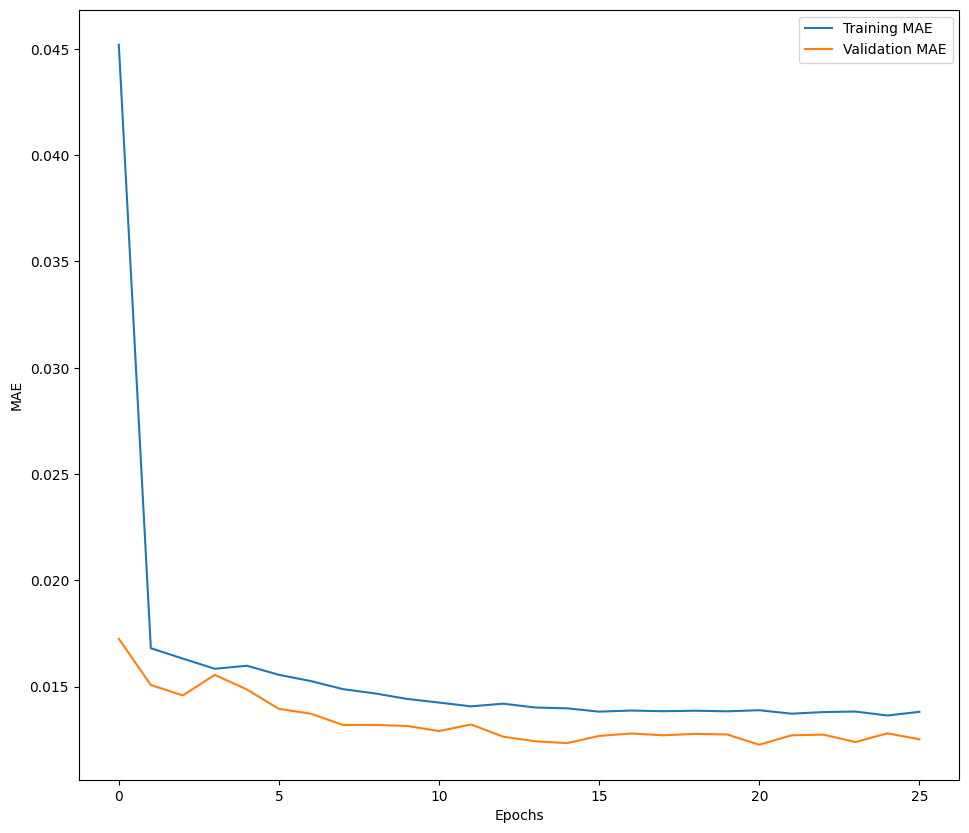

In [213]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

<b><h3>Plot Loss</h3></b>

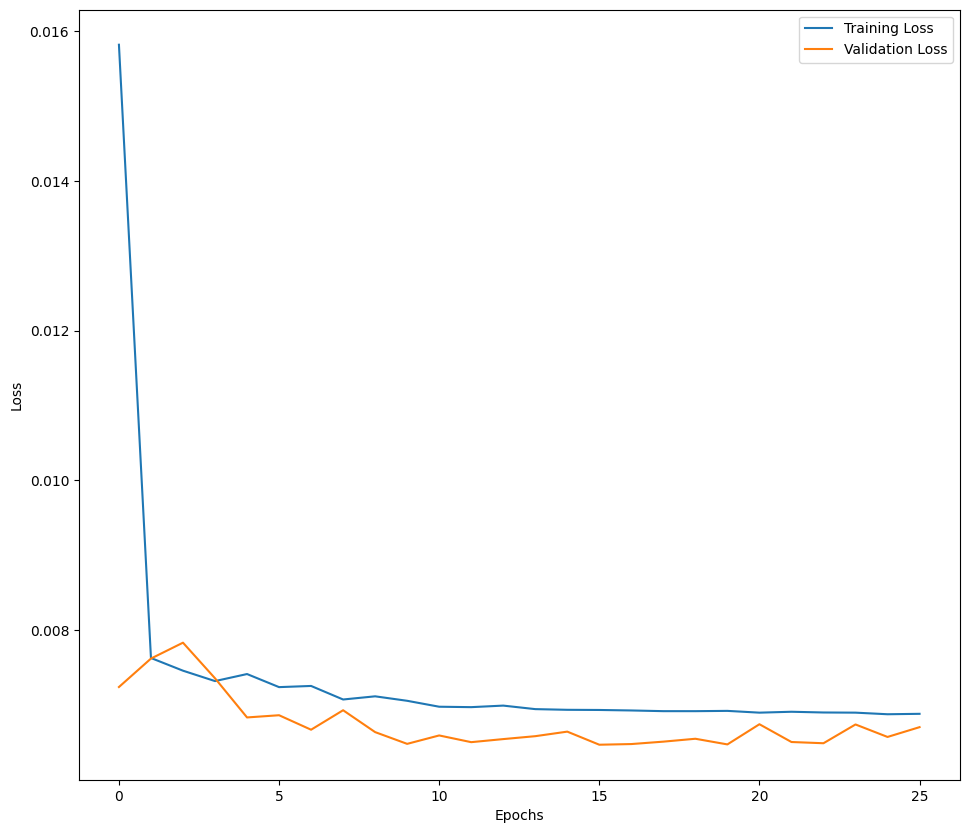

In [214]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()